In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

In [4]:
# Reading in data
df = pd.read_csv('./data/comment_data_oct_nov.csv')
# Creating new columns for eda
df['length'] = [len(df['body'][i]) for i in range(len(df['body']))]
df['created_utc'] = df.created_utc.apply(lambda x: datetime.datetime.fromtimestamp(x))
df['day_posted'] = [dt.weekday() for dt in df['created_utc']]
# Making two separate dataframes for eda
df_nfl = df.loc[df['subreddit'] == 'nfl',['body', 'subreddit']]
df_ff = df.loc[df['subreddit'] == 'fantasyfootball',['body', 'subreddit']]

In [5]:
# Vectorizing dataframes for eda
cvec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS.union(['nfl', 'fantasy','football', 'just', 'like', 'don','ve', 'got']))
cvec.fit(df_nfl['body'])

df_nfl_cvec = pd.DataFrame(cvec.transform(df_nfl['body']).todense(),
                 columns = cvec.get_feature_names())

cvec = CountVectorizer(stop_words = ENGLISH_STOP_WORDS.union(['nfl', 'fantasy','football', 'just', 'like', 'don', 've', 'got']))
cvec.fit(df_ff['body'])

df_ff_cvec = pd.DataFrame(cvec.transform(df_ff['body']).todense(),
                 columns = cvec.get_feature_names())

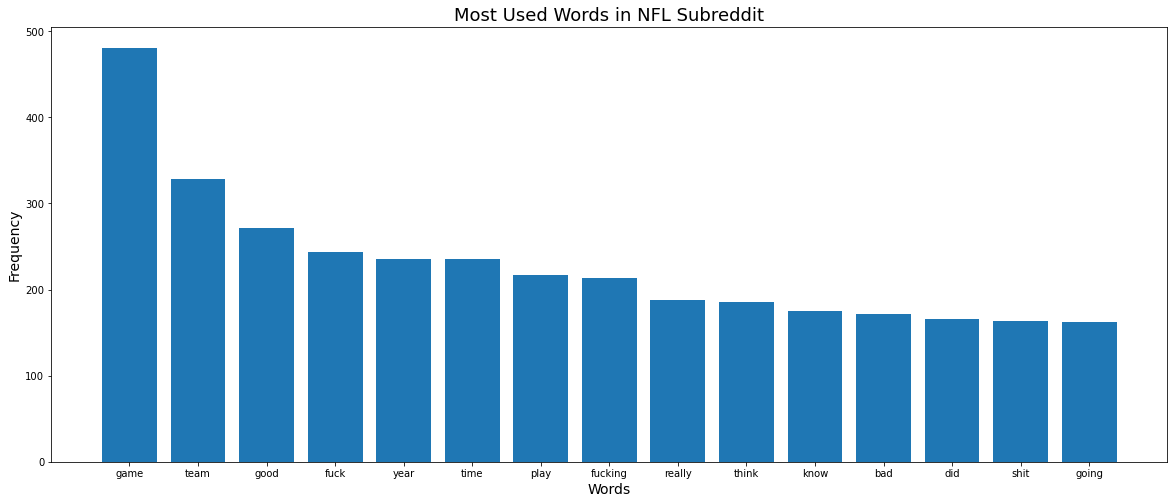

In [6]:
nfl_top_words = df_nfl_cvec.sum().sort_values(ascending = False).head(15)
plt.figure(figsize = (20, 8))
plt.bar(nfl_top_words.index, nfl_top_words)
plt.title('Most Used Words in NFL Subreddit', fontsize = 18)
plt.xlabel('Words', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14);

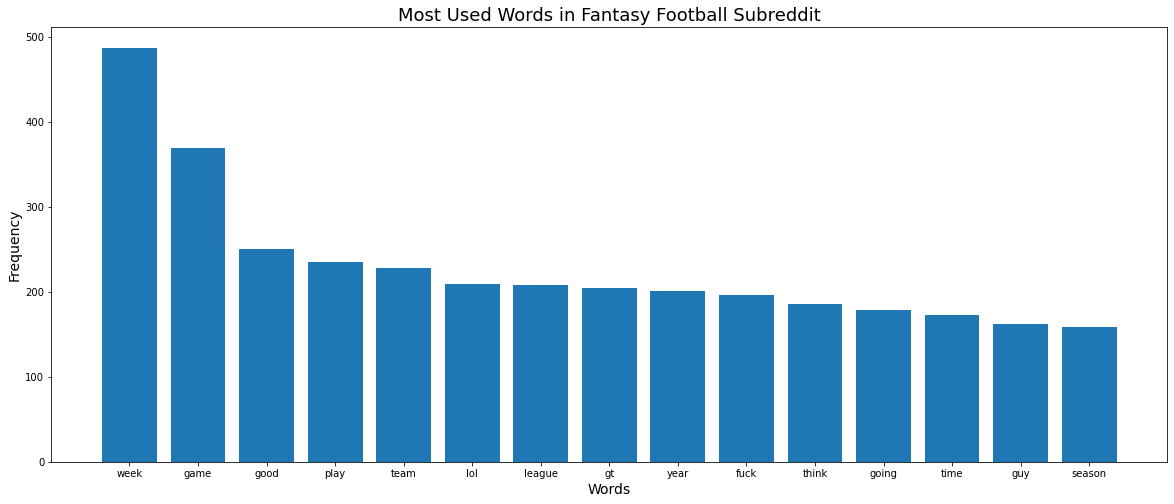

In [7]:
ff_top_words = df_ff_cvec.sum().sort_values(ascending = False).head(15)
plt.figure(figsize = (20, 8))
plt.bar(ff_top_words.index, ff_top_words)
plt.title('Most Used Words in Fantasy Football Subreddit', fontsize = 18)
plt.xlabel('Words', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14);

**Conclusions:** One thing that jumps out is how often commenters in the nfl subreddit swear. I don't think it will be an important factor in the analysis fantasy football commenters also swear at a high rate. Other words that jump out to me are week and league. Both are used very often in the fantasy football subreddit, and do not make the top 15 for the nfl subreddit. Football has a weekly schedule, so both groups would be likely to use the word week. Fantasy football likely uses it more because fantasy football games are also by week. Fantasy football owners are probably also talking about the leauges that they play in as opposed to the National Football League.

In [8]:
# Creating Dataframes to find average upvotes per comment per day
df_nfl_day = df.loc[df['subreddit'] == 'nfl', ['day_posted', 'score']]
df_nfl_day = df_nfl_day.groupby('day_posted').mean()

df_ff_day = df.loc[df['subreddit'] == 'fantasyfootball', ['day_posted', 'score']]
#df_ff_day['score'] = minmax_scale(df_ff_day['score'])
df_ff_day = df_ff_day.groupby('day_posted').mean()

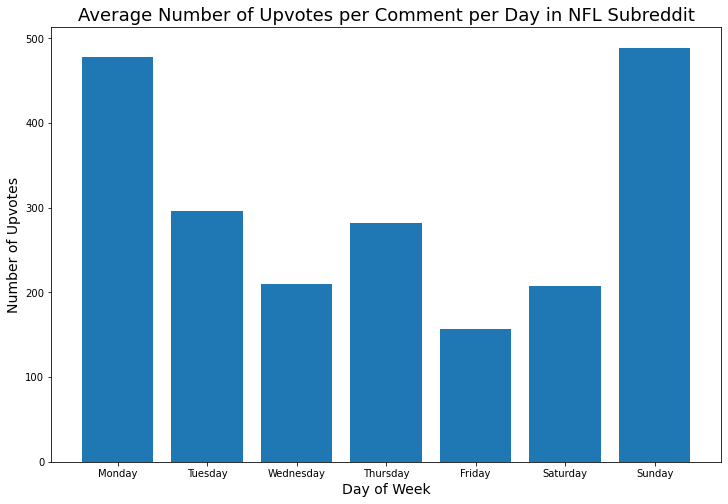

In [9]:
plt.figure(figsize = (12,8))
plt.bar(df_nfl_day.index, df_nfl_day.groupby('day_posted').mean()['score'])
plt.title('Average Number of Upvotes per Comment per Day in NFL Subreddit', fontsize = 18)
plt.xticks(ticks = [0,1,2,3,4,5,6],
           labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week', fontsize = 14)
plt.ylabel('Number of Upvotes', fontsize = 14);

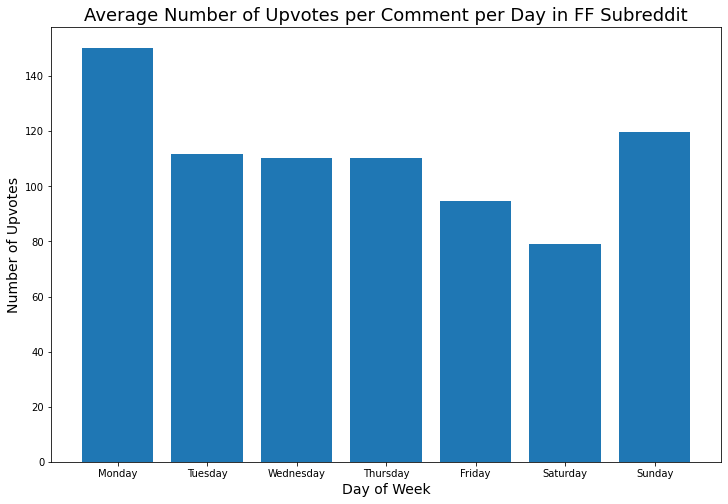

In [10]:
plt.figure(figsize = (12,8))
plt.bar(df_ff_day.index, df_ff_day.groupby('day_posted').mean()['score'])
plt.title('Average Number of Upvotes per Comment per Day in FF Subreddit', fontsize = 18)
plt.xticks(ticks = [0,1,2,3,4,5,6],
           labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week', fontsize = 14)
plt.ylabel('Number of Upvotes', fontsize = 14);

**Conclusion:** The nfl subreddit sees the most activity on Sunday and Monday. This makes sense as games are played on those days so people will be more likely to talk about football. There is a significant drop in activity on days that football is not being played. While the fantasy football subreddit has similar spikes, there is a more consistent distribution of activity. This makes sense because during the off days, fantasy football players are doing things such as picking up/dropping players and setting lineups. This shows that people posting about football on off days are more likely to be interested in fantasy football.